### setting working directory to the desired folder

In [1]:
import os
os.getcwd()

'C:\\Users\\vsgok'

In [2]:
os.chdir("C:\\Users\\vsgok\\Downloads\\mmds datasets")

In [3]:
os.getcwd()

'C:\\Users\\vsgok\\Downloads\\mmds datasets'

In [4]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
import time

In [5]:
data=pd.read_csv("diabetes.csv")

In [6]:
print("the dim of dataset is:")
print(data.shape)
print()
print("head of the dataset:")
print(data.head())

the dim of dataset is:
(768, 9)

head of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
print(type(data))#checking whether the data is dataframe??
#no.of.rows(indices)
data.index
#column names
data['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>


0    500
1    268
Name: Outcome, dtype: int64

## removing null values if present

In [8]:
#checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### no null values is found- so moving to data analysis


## Visualisation

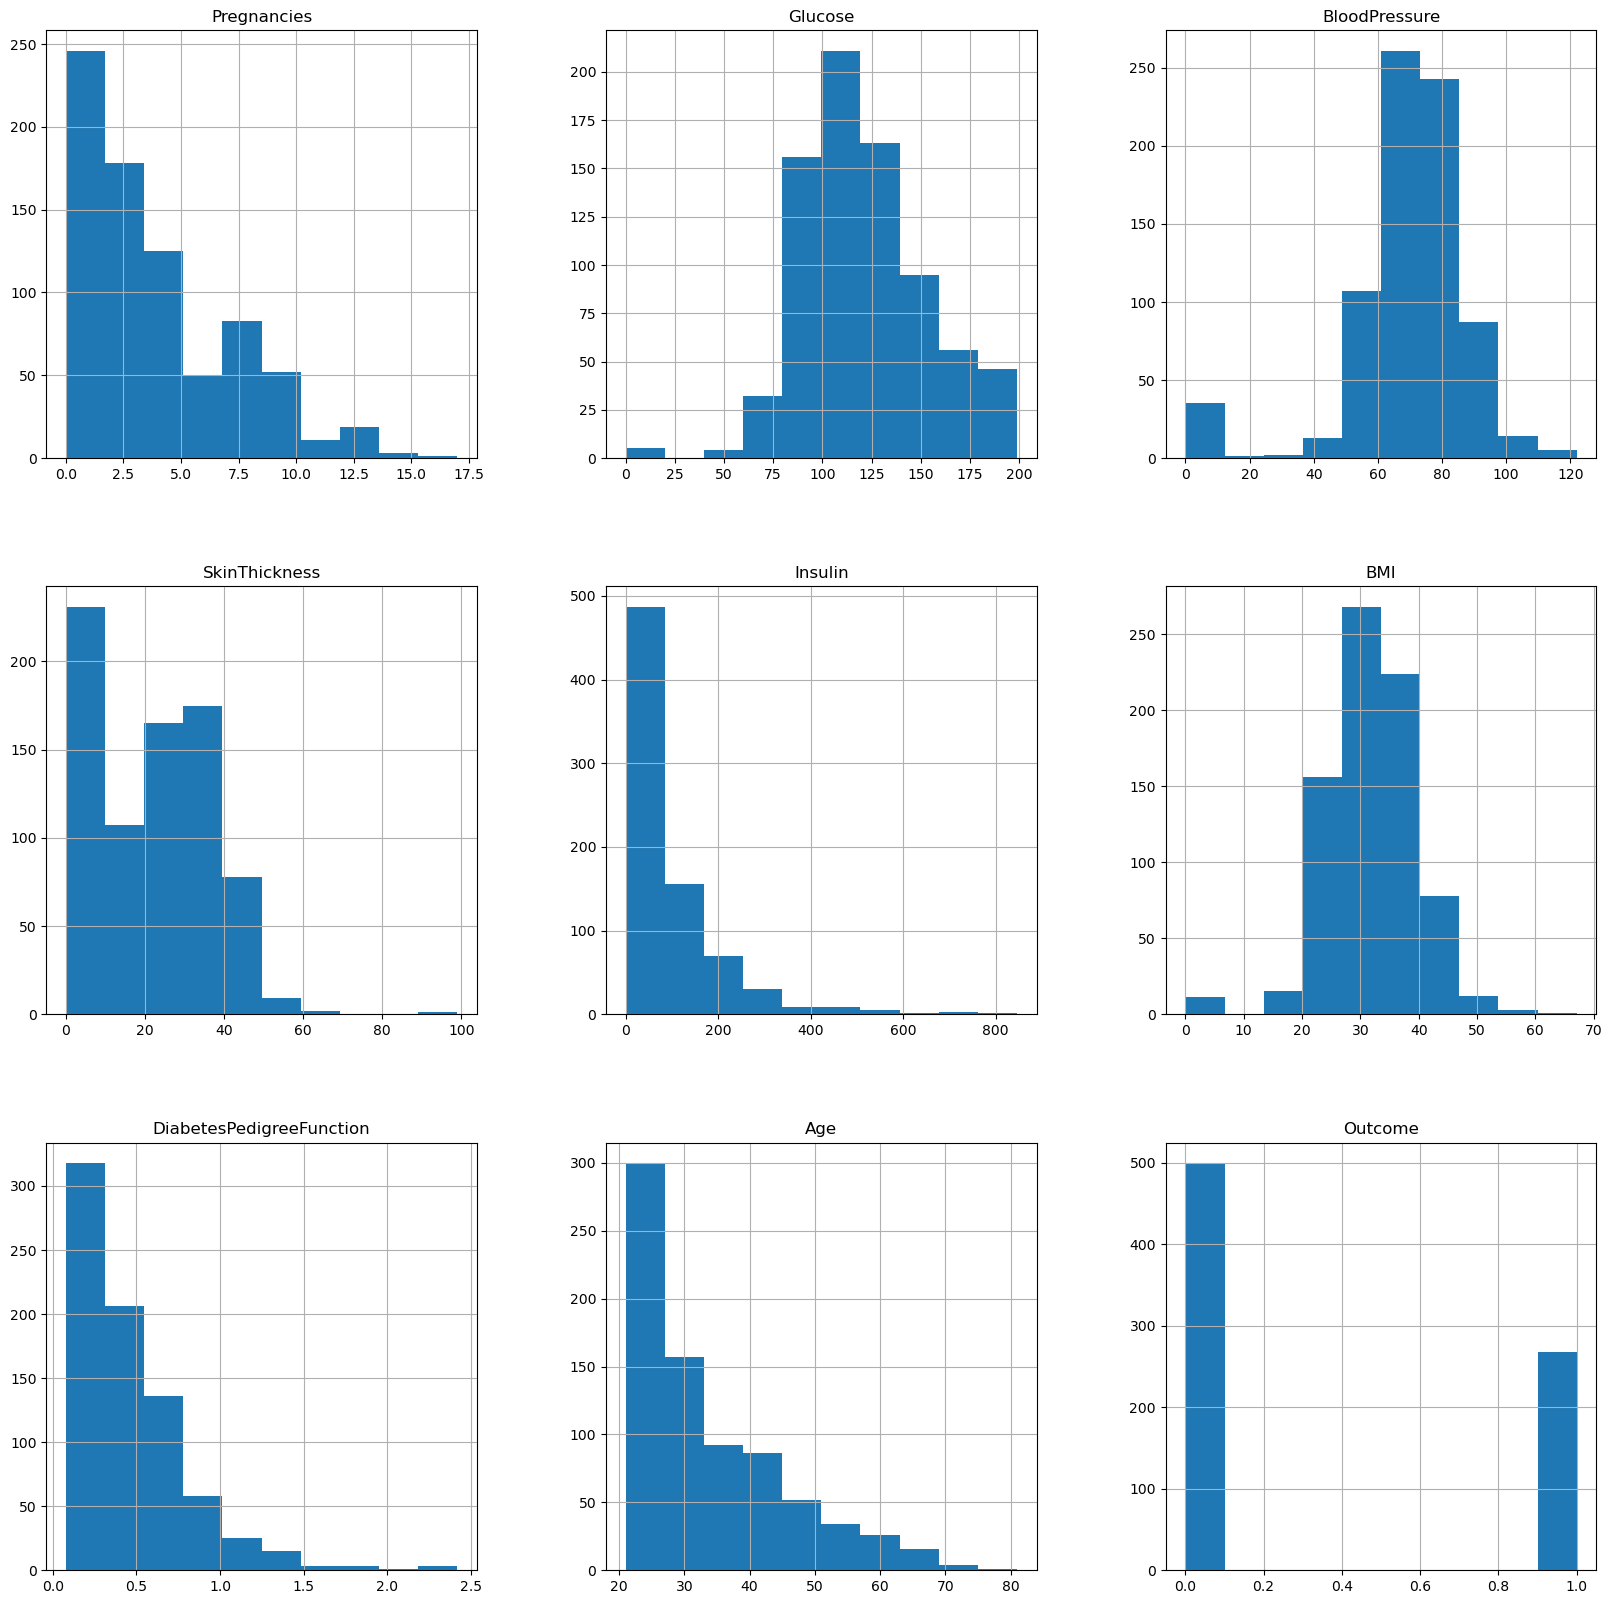

In [9]:
histogram=data.hist(figsize=(20,20))

<AxesSubplot:>

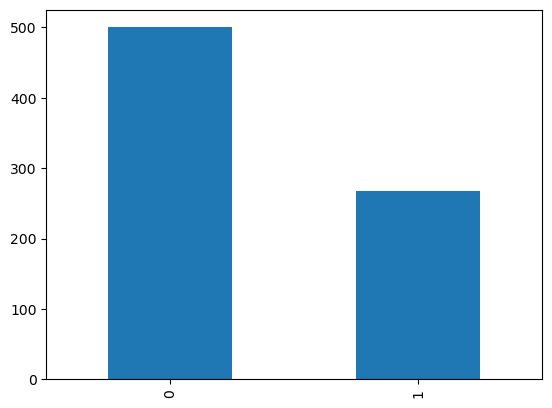

In [10]:
data.Outcome.value_counts().plot(kind="bar")

### seperating data into train and test

In [11]:
np.random.seed(123)
X=data.drop('Outcome',axis=1)
y=data['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)


(537, 8)
(231, 8)
537
231


# Without feature selection

## BAYESIAN CLASSIFIER

In [12]:
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)
st=time.time()
nb_y_pred=nbmodel.predict(X_test)
end=time.time()
eval_time=end-st

In [13]:
#model evaluation- confusion matrix
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[128,  18],
       [ 32,  53]], dtype=int64)

<AxesSubplot:>

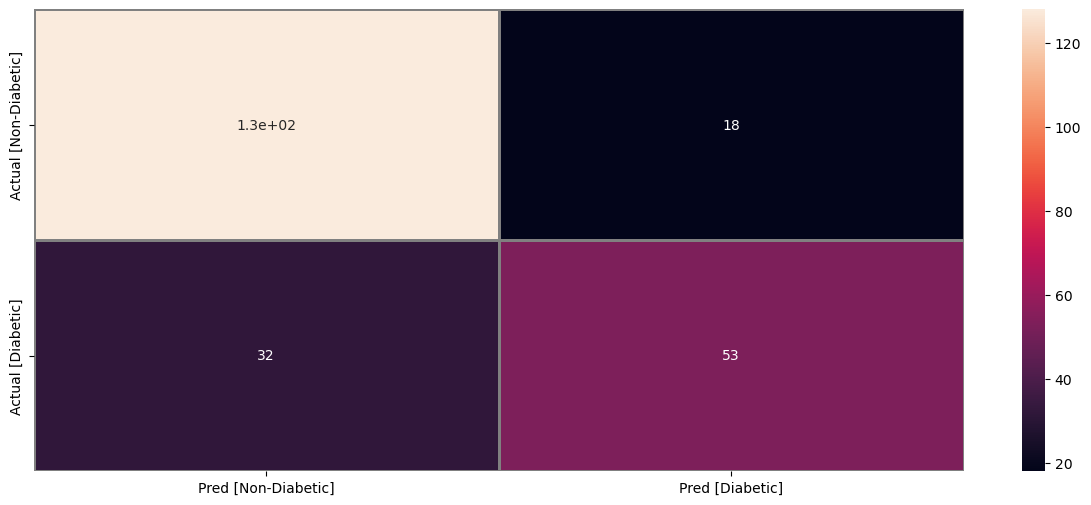

In [14]:
#model evaluation- confusion matrix
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [15]:
acc=nbmodel.score(X_test,y_test) * 100
print('Accuracy of Naive Bayes Classifier is: ',acc,'%')
print(classification_report(y_test, nb_y_pred))
print("time taken for classification:",eval_time)

inc_sum=nbConfusion[0][1]+nbConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=nbConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of Naive Bayes Classifier is:  78.35497835497836 %
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

time taken for classification: 0.001995086669921875
The error rate is: 21.645021645021643 %


## decision Tree

In [16]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
st=time.time()
y_pred=clf.predict(X_test)
end=time.time()
eval_time2=end-st

In [17]:
#model evaluation- confusion matrix
dtConfusion = metrics.confusion_matrix(y_test, y_pred)
dtConfusion

array([[116,  30],
       [ 44,  41]], dtype=int64)

<AxesSubplot:>

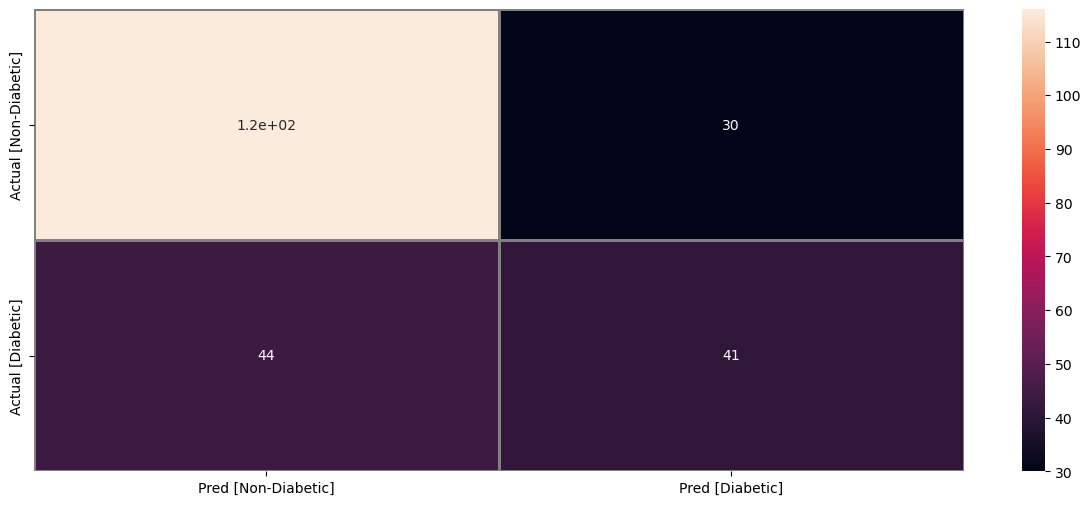

In [18]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(dtConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [19]:
acc=clf.score(X_test,y_test) * 100
print('Accuracy of Decision tree is: ',acc,'%')
print(classification_report(y_test, y_pred))
print("time taken for classification:",eval_time2)

inc_sum=dtConfusion[0][1]+dtConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=dtConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of Decision tree is:  67.96536796536796 %
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       146
           1       0.58      0.48      0.53        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231

time taken for classification: 0.0010514259338378906
The error rate is: 32.03463203463203 %


## Random forest

In [20]:
rf=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
st=time.time()
rf_pred=rf.predict(X_test)
end=time.time()
eval_time=end-st

In [21]:
#model evaluation- confusion matrix
rfConfusion = metrics.confusion_matrix(y_test, rf_pred)
rfConfusion

array([[135,  11],
       [ 43,  42]], dtype=int64)

<AxesSubplot:>

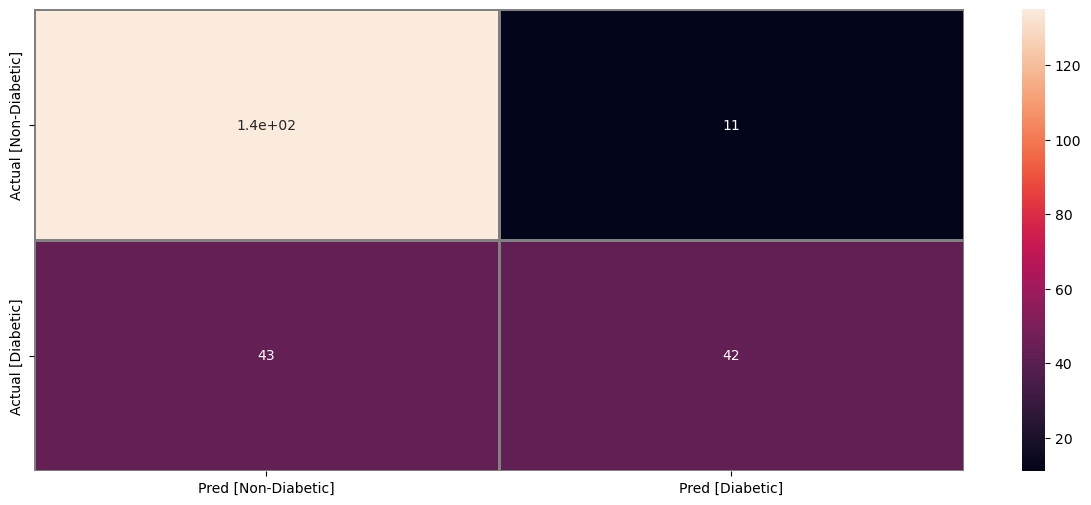

In [22]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(rfConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [23]:
acc=rf.score(X_test,y_test) * 100
print('Accuracy of Random forest is: ',acc,'%')
print(classification_report(y_test, rf_pred))
print("time taken for classification:",eval_time)

inc_sum=rfConfusion[0][1]+rfConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=rfConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of Random forest is:  76.62337662337663 %
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       146
           1       0.79      0.49      0.61        85

    accuracy                           0.77       231
   macro avg       0.78      0.71      0.72       231
weighted avg       0.77      0.77      0.75       231

time taken for classification: 0.010211944580078125
The error rate is: 23.376623376623375 %


##  Support vector machine

In [24]:
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)
st=time.time()
svm_pred=svm.predict(X_test)
end=time.time()
eval_time=end-st

In [25]:
#model evaluation- confusion matrix
svmConfusion = metrics.confusion_matrix(y_test, svm_pred)
svmConfusion

array([[138,   8],
       [ 45,  40]], dtype=int64)

<AxesSubplot:>

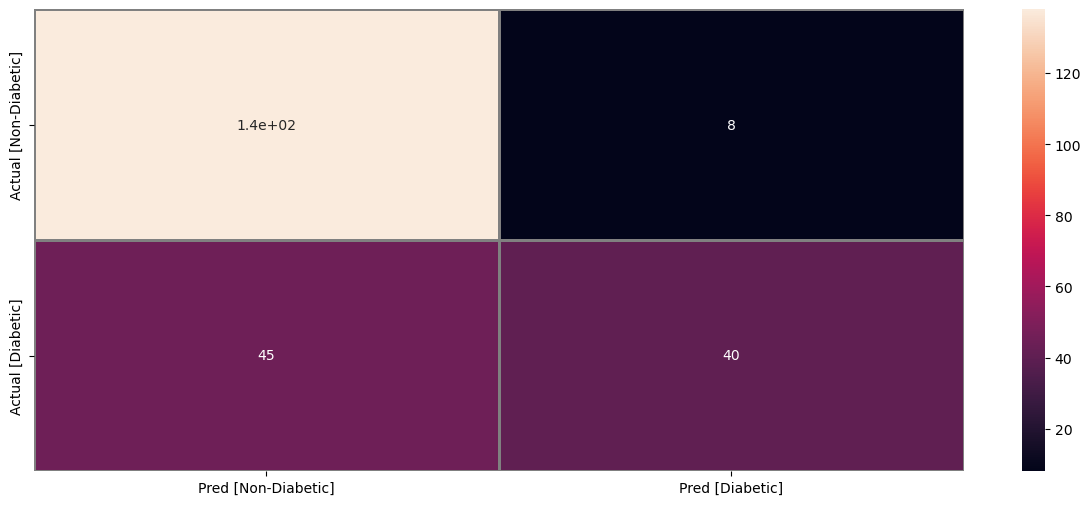

In [26]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(svmConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [27]:
acc=svm.score(X_test,y_test) * 100
print('Accuracy of support vector machine is: ',acc,'%')
print(classification_report(y_test, svm_pred))
print("time taken for classification:",eval_time)


inc_sum=svmConfusion[0][1]+svmConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=svmConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of support vector machine is:  77.05627705627705 %
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       146
           1       0.83      0.47      0.60        85

    accuracy                           0.77       231
   macro avg       0.79      0.71      0.72       231
weighted avg       0.78      0.77      0.75       231

time taken for classification: 0.019948720932006836
The error rate is: 22.943722943722943 %


## KNN classifier

In [28]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [29]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [30]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.48917748917748 % and k = [13]


In [31]:
#using 13 for the model, because of identified test scoe which give the optimum results.
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
st=time.time()
knn_pred = knn.predict(X_test)
end=time.time()
eval_time=end-st

In [32]:
#model evaluation- confusion matrix
knnConfusion = metrics.confusion_matrix(y_test, knn_pred)
knnConfusion

array([[132,  14],
       [ 38,  47]], dtype=int64)

<AxesSubplot:>

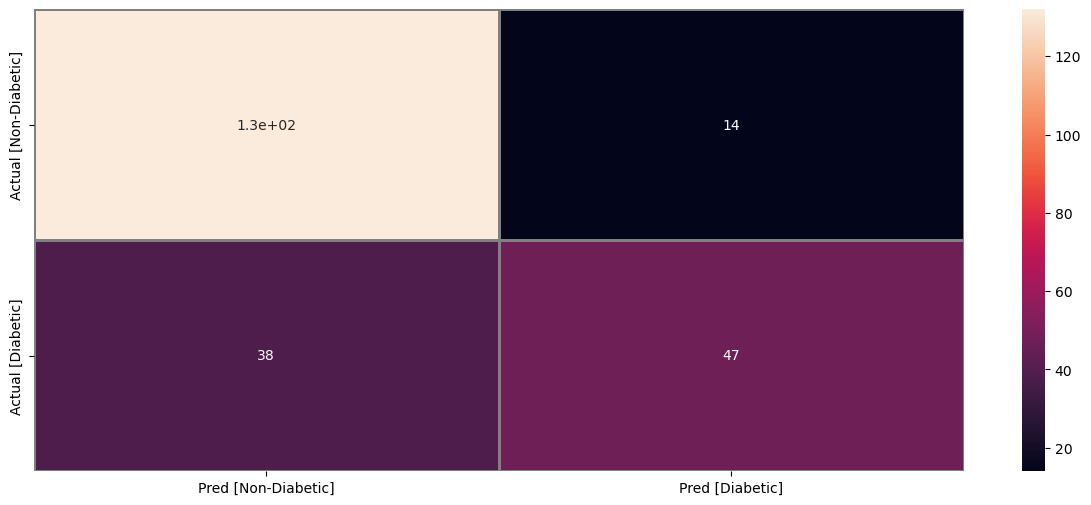

In [33]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(knnConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [34]:
acc=knn.score(X_test,y_test) * 100
print('Accuracy of KNN classifier tree is: ',acc,'%')
print(classification_report(y_test, knn_pred))
print("time taken for classification:",eval_time)

inc_sum=knnConfusion[0][1]+knnConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=knnConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of KNN classifier tree is:  77.48917748917748 %
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

time taken for classification: 0.016463518142700195
The error rate is: 22.51082251082251 %


## Back propogation neural network

In [35]:
#Scaling the train
X=scale(X)
#one hot encoding
y_train=np_utils.to_categorical(y_train)
bpn=Sequential()
bpn.add(Dense(12,input_dim=8,activation='relu'))
bpn.add(Dense(8,activation='relu'))
bpn.add(Dense(2,activation='sigmoid'))
bpn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
bpn.fit(X_train, y_train,epochs=100,batch_size=10)
#increase in no.of.epochs, increase in the accuracy of the output

Epoch 1/100
54/54 [==============================] - 1s 1ms/step - loss: 5.5160 - accuracy: 0.6034
Epoch 2/100
54/54 [==============================] - 0s 1ms/step - loss: 2.3277 - accuracy: 0.6443
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 1.2569 - accuracy: 0.6667
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.6592
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.6667
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.6648
Epoch 7/100
54/54 [==============================] - 0s 956us/step - loss: 0.7083 - accuracy: 0.6648
Epoch 8/100
54/54 [==============================] - 0s 799us/step - loss: 0.6982 - accuracy: 0.6648
Epoch 9/100
54/54 [==============================] - 0s 892us/step - loss: 0.7010 - accuracy: 0.6611
Epoch 10/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.6648
Epo

54/54 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6760
Epoch 83/100
54/54 [==============================] - 0s 803us/step - loss: 0.6088 - accuracy: 0.6723
Epoch 84/100
54/54 [==============================] - 0s 909us/step - loss: 0.5982 - accuracy: 0.6741
Epoch 85/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.6704
Epoch 86/100
54/54 [==============================] - 0s 897us/step - loss: 0.6042 - accuracy: 0.6741
Epoch 87/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6760
Epoch 88/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6704
Epoch 89/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6760
Epoch 90/100
54/54 [==============================] - 0s 855us/step - loss: 0.5962 - accuracy: 0.6723
Epoch 91/100
54/54 [==============================] - 0s 535us/step - loss: 0.5864 - accuracy: 0.6741
Epo

In [37]:
st=time.time()
bpn_pred=bpn.predict(X_test)
bpn_pred=np.argmax(bpn_pred, axis=1)
end=time.time()
eval_time=end-st

8/8 [==============================] - 0s 2ms/step


In [38]:
#model evaluation- confusion matrix
bpnConfusion = metrics.confusion_matrix(y_test, bpn_pred)
bpnConfusion

array([[137,   9],
       [ 81,   4]], dtype=int64)

<AxesSubplot:>

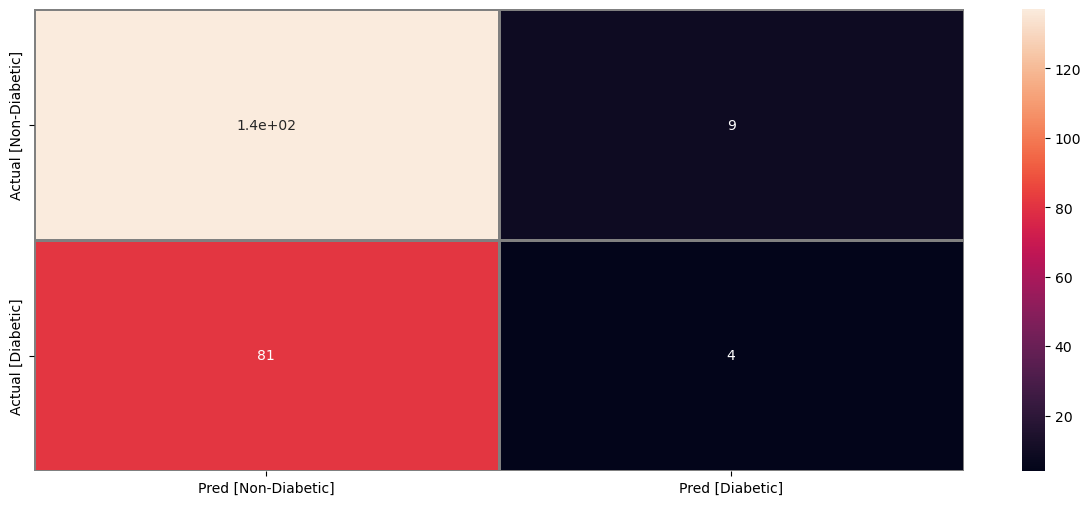

In [39]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(bpnConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [40]:
acc=accuracy_score(y_test,bpn_pred)*100
print('Accuracy of back propagation neural network is: ',acc,'%')
print(classification_report(y_test, bpn_pred))
print("time taken for classification:",eval_time)


inc_sum=bpnConfusion[0][1]+bpnConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=bpnConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of back propagation neural network is:  61.038961038961034 %
              precision    recall  f1-score   support

           0       0.63      0.94      0.75       146
           1       0.31      0.05      0.08        85

    accuracy                           0.61       231
   macro avg       0.47      0.49      0.42       231
weighted avg       0.51      0.61      0.51       231

time taken for classification: 0.25704479217529297
The error rate is: 38.961038961038966 %


## With feature selection 

### using random forest for selectng features 

In [41]:
#feature selection using random forest by using the same train and test
sel = SelectFromModel(RandomForestClassifier(n_estimators = 150))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Glucose', 'BMI', 'Age'], dtype='object')


<AxesSubplot:>

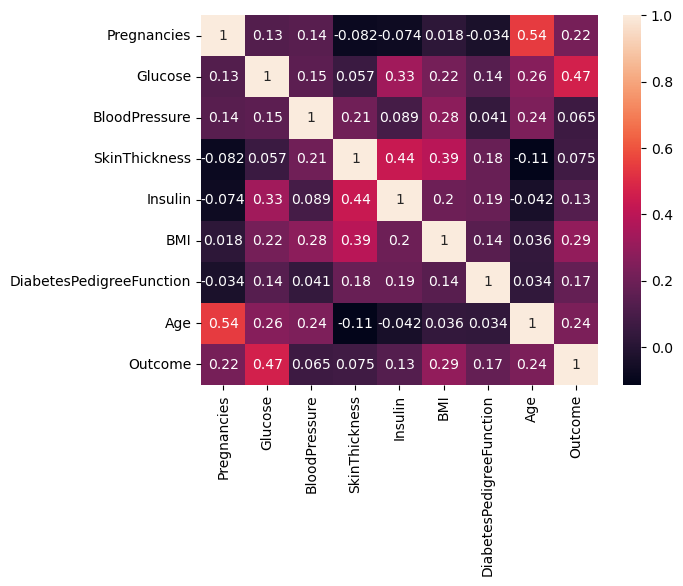

In [42]:
sns.heatmap(data.corr(),annot=True)

### creating new train and test for the dataset with selected features

In [43]:
np.random.seed(123)
X=data.drop(labels=['Pregnancies','BloodPressure','SkinThickness','Insulin','Outcome'],axis=1)
y=data['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(537, 4)
(231, 4)
537
231


## bayesian classifier

In [44]:
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)
st=time.time()
nb_y_pred=nbmodel.predict(X_test)
end=time.time()
eval_time=end-st

In [45]:
#model evaluation- confusion matrix
nbConfusion = metrics.confusion_matrix(y_test,nb_y_pred)
nbConfusion

array([[132,  14],
       [ 31,  54]], dtype=int64)

<AxesSubplot:>

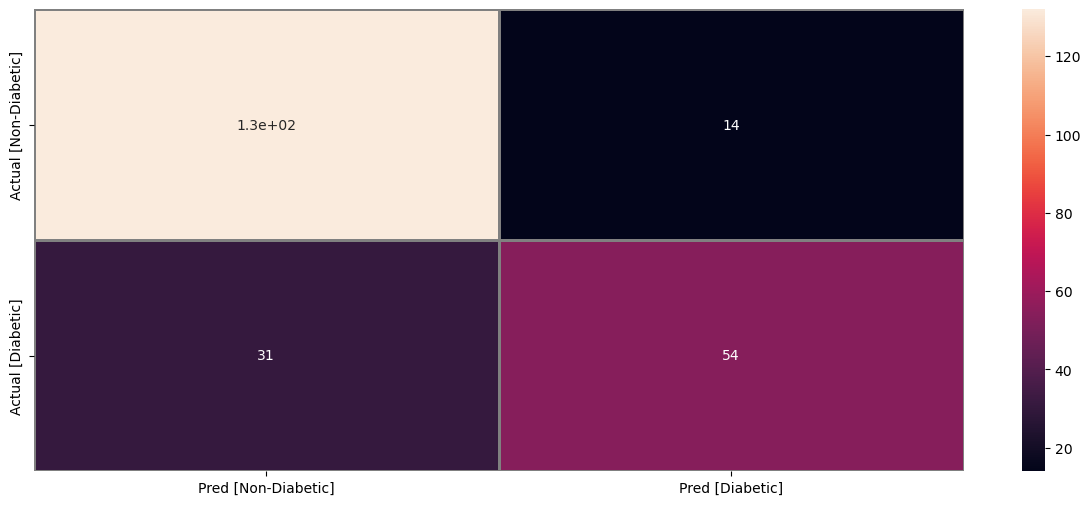

In [46]:
#model evaluation- confusion matrix
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [47]:
acc=nbmodel.score(X_test,y_test) * 100
print('Accuracy of Naive Bayes Classifier is: ',acc,'%')
print(classification_report(y_test, nb_y_pred))
print("time taken for classification:",eval_time)

inc_sum=nbConfusion[0][1]+nbConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=nbConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of Naive Bayes Classifier is:  80.51948051948052 %
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.79      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231

time taken for classification: 0.0019986629486083984
The error rate is: 19.480519480519483 %


## Decision tree

In [48]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
st=time.time()
y_pred=clf.predict(X_test)
end=time.time()
eval_time2=end-st

In [49]:
#model evaluation- confusion matrix
dtConfusion = metrics.confusion_matrix(y_test, y_pred)
dtConfusion

array([[113,  33],
       [ 39,  46]], dtype=int64)

<AxesSubplot:>

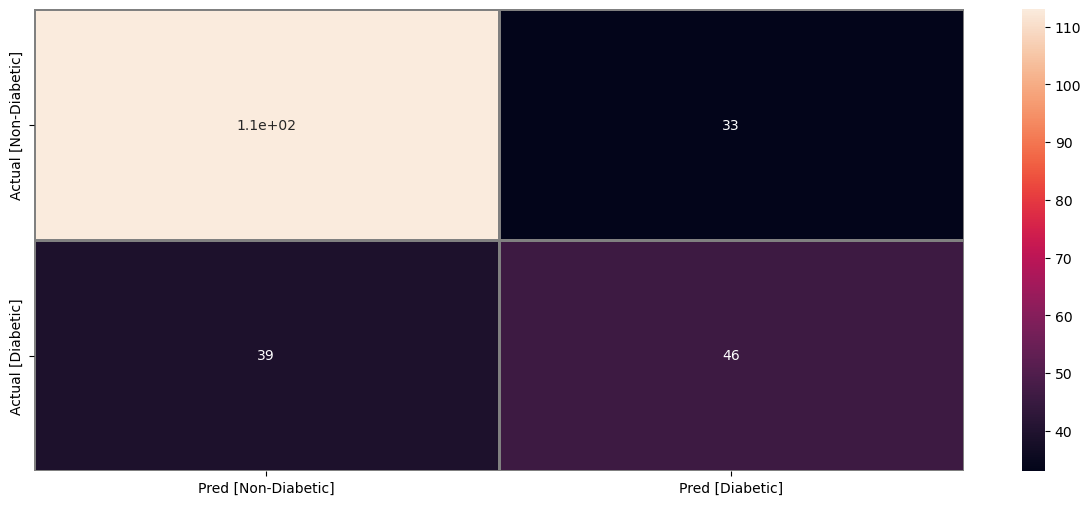

In [50]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(dtConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [51]:
acc=clf.score(X_test,y_test) * 100
print('Accuracy of Decision tree is: ',acc,'%')
print(classification_report(y_test, y_pred))
print("time taken for classification:",eval_time2)
inc_sum=dtConfusion[0][1]+dtConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=dtConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of Decision tree is:  68.83116883116884 %
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       146
           1       0.58      0.54      0.56        85

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.68      0.69      0.69       231

time taken for classification: 0.0029914379119873047
The error rate is: 31.16883116883117 %


## support vector machine

In [52]:
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)
st=time.time()
svm_pred=svm.predict(X_test)
end=time.time()
eval_time=end-st

In [53]:
#model evaluation- confusion matrix
svmConfusion = metrics.confusion_matrix(y_test, svm_pred)
svmConfusion

array([[137,   9],
       [ 42,  43]], dtype=int64)

<AxesSubplot:>

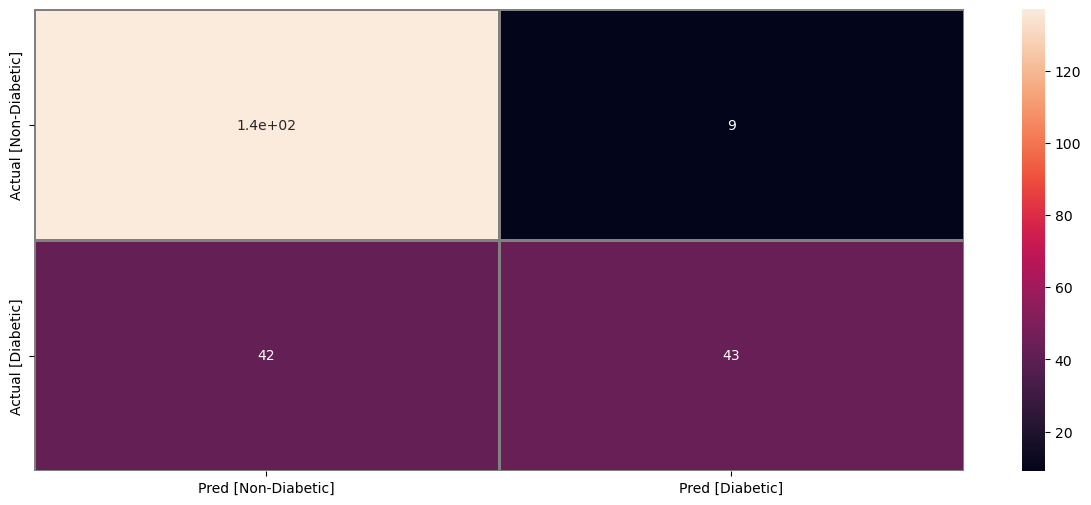

In [54]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(svmConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [55]:
acc=svm.score(X_test,y_test) * 100
print('Accuracy of support vector machine is: ',acc,'%')
print(classification_report(y_test, svm_pred))
print("time taken for classification:",eval_time)

inc_sum=svmConfusion[0][1]+svmConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=svmConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of support vector machine is:  77.92207792207793 %
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       146
           1       0.83      0.51      0.63        85

    accuracy                           0.78       231
   macro avg       0.80      0.72      0.74       231
weighted avg       0.79      0.78      0.76       231

time taken for classification: 0.011878728866577148
The error rate is: 22.07792207792208 %


## KNN classifier


In [56]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [57]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [58]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 80.08658008658008 % and k = [12]


In [59]:
#using 12 for the model, because of identified test scoe which give the optimum results.
knn = KNeighborsClassifier(12)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
st=time.time()
knn_pred = knn.predict(X_test)
end=time.time()
eval_time=end-st

In [60]:
#model evaluation- confusion matrix
knnConfusion = metrics.confusion_matrix(y_test, knn_pred)
knnConfusion

array([[134,  12],
       [ 34,  51]], dtype=int64)

<AxesSubplot:>

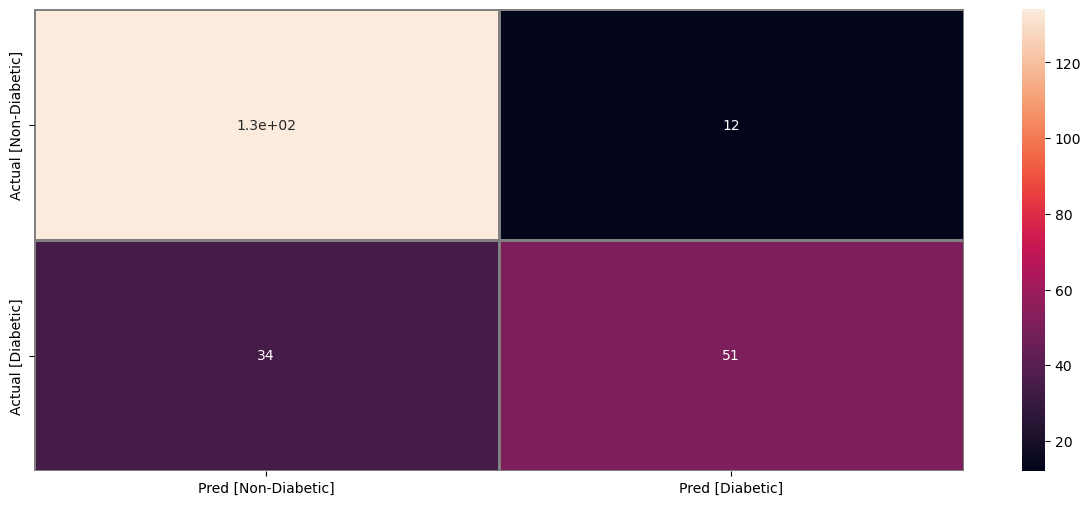

In [61]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(knnConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [62]:
acc=knn.score(X_test,y_test) * 100
print('Accuracy of KNN classifier tree is: ',acc,'%')
print(classification_report(y_test, knn_pred))
print("time taken for classification:",eval_time)

inc_sum=knnConfusion[0][1]+knnConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=knnConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of KNN classifier tree is:  80.08658008658008 %
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       146
           1       0.81      0.60      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

time taken for classification: 0.013566970825195312
The error rate is: 19.913419913419915 %


## backpropogation neural network

In [63]:
#Scaling the train
X=scale(X)
#one hot encoding
y_train=np_utils.to_categorical(y_train)
bpn=Sequential()
bpn.add(Dense(12,input_dim=4,activation='relu'))
bpn.add(Dense(8,activation='relu'))
bpn.add(Dense(2,activation='sigmoid'))
bpn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
bpn.fit(X_train, y_train,epochs=100,batch_size=10)
#increase in no.of.epochs, increase in the accuracy of the output

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 4.8827 - accuracy: 0.6592
Epoch 2/100
54/54 [==============================] - 0s 1ms/step - loss: 1.9593 - accuracy: 0.6592
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 0.9591 - accuracy: 0.6592
Epoch 4/100
54/54 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.6592
Epoch 5/100
54/54 [==============================] - 0s 916us/step - loss: 0.6914 - accuracy: 0.6592
Epoch 6/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6592
Epoch 7/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6592
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6592
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6592
Epoch 10/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6592
Epoch 1

54/54 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6611
Epoch 83/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6685
Epoch 84/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6648
Epoch 85/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6853
Epoch 86/100
54/54 [==============================] - 0s 872us/step - loss: 0.6100 - accuracy: 0.6667
Epoch 87/100
54/54 [==============================] - 0s 851us/step - loss: 0.6104 - accuracy: 0.6741
Epoch 88/100
54/54 [==============================] - 0s 864us/step - loss: 0.6114 - accuracy: 0.6778
Epoch 89/100
54/54 [==============================] - 0s 801us/step - loss: 0.6039 - accuracy: 0.6760
Epoch 90/100
54/54 [==============================] - 0s 796us/step - loss: 0.6102 - accuracy: 0.6797
Epoch 91/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.6927
Epo

In [65]:
st=time.time()
bpn_pred=bpn.predict(X_test)
bpn_pred=np.argmax(bpn_pred, axis=1)
end=time.time()
eval_time=end-st

8/8 [==============================] - 0s 3ms/step


In [66]:
#model evaluation- confusion matrix
bpnConfusion = metrics.confusion_matrix(y_test, bpn_pred)
bpnConfusion

array([[141,   5],
       [ 61,  24]], dtype=int64)

<AxesSubplot:>

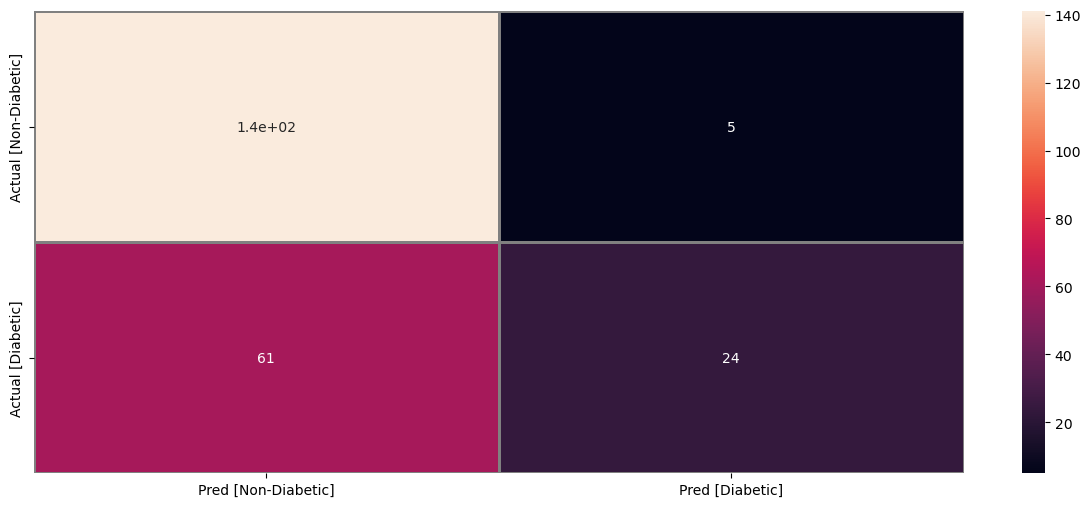

In [67]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(bpnConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='grey', linewidths=1)

In [68]:
acc=accuracy_score(y_test,bpn_pred)*100
print('Accuracy of back propagation neural network is: ',acc,'%')
print(classification_report(y_test, bpn_pred))
print("time taken for classification:",eval_time)

inc_sum=bpnConfusion[0][1]+bpnConfusion[1][0]
total=0
for i in range (2):
    for j in range(2):
        total+=bpnConfusion[i][j]
        
error_rate=(inc_sum/total)*100
print("The error rate is:",error_rate,"%")

Accuracy of back propagation neural network is:  71.42857142857143 %
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       146
           1       0.83      0.28      0.42        85

    accuracy                           0.71       231
   macro avg       0.76      0.62      0.62       231
weighted avg       0.75      0.71      0.67       231

time taken for classification: 0.14420390129089355
The error rate is: 28.57142857142857 %
